<a href="https://colab.research.google.com/github/gopalchettri/DeepLearning/blob/master/1_b_Overfitting_Underfitting_and_Reqularization_Dropout_technique_using_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Demonstrating overfitting, good fit, by training a neural network on a small dataset without regularization.**

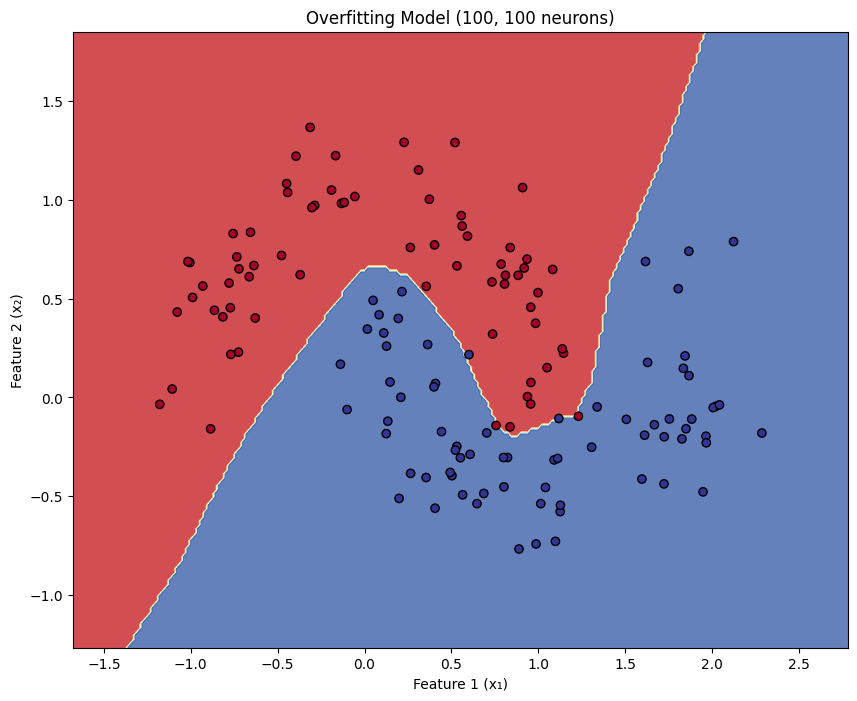

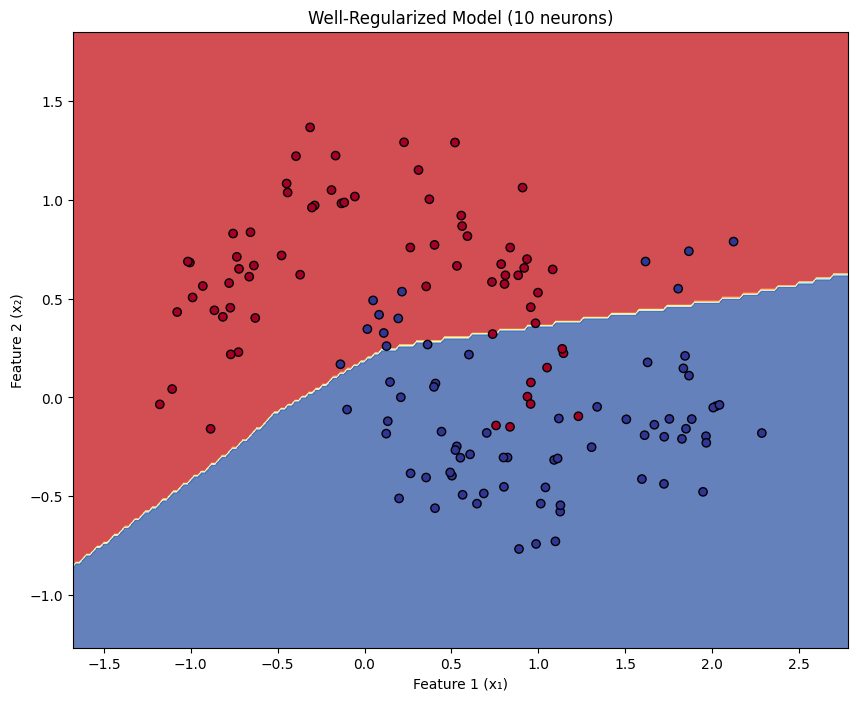

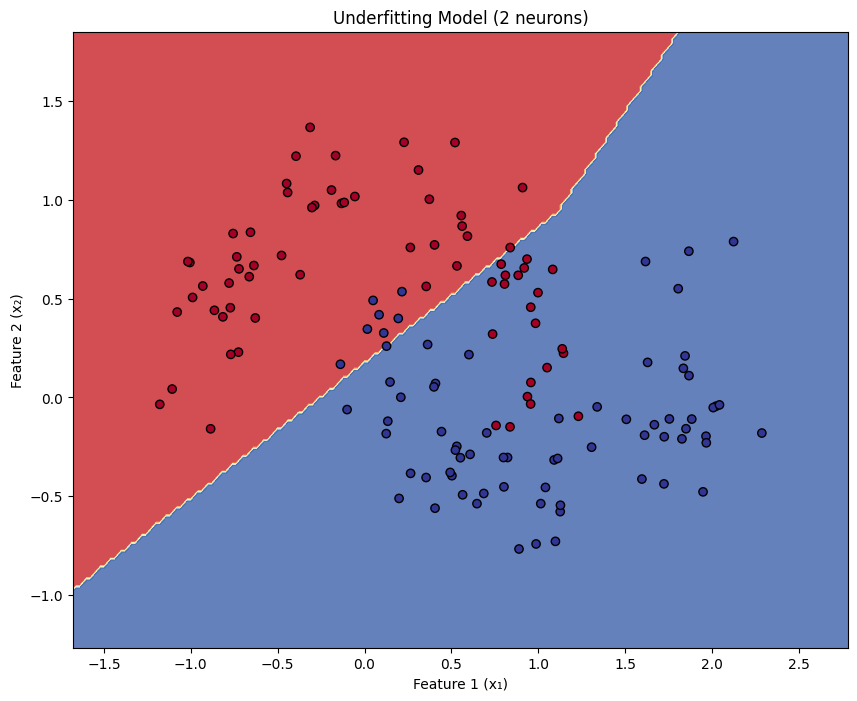

Overfitting Model:
- Training Accuracy: 0.9714 (Memorization)
- Testing Accuracy:  0.9500 (Generalization)
- Gap: 0.0214

Good Fit Model:
- Training Accuracy: 0.8429 (Memorization)
- Testing Accuracy:  0.8333 (Generalization)
- Gap: 0.0095

Underfitting Model:
- Training Accuracy: 0.8000 (Memorization)
- Testing Accuracy:  0.8667 (Generalization)
- Gap: -0.0667



In [1]:
# Import required libraries for data handling, visualization, and machine learning
import numpy as np  # Fundamental package for numerical computations and array operations
import matplotlib.pyplot as plt  # Plotting library for data visualization
from sklearn.datasets import make_moons  # Function to generate synthetic non-linear data
from sklearn.model_selection import train_test_split  # Utility for splitting datasets
from sklearn.neural_network import MLPClassifier  # Multi-layer Perceptron implementation
from sklearn.metrics import accuracy_score  # Metric for classification performance evaluation

# Generate synthetic moons dataset with controlled randomness
# n_samples=200: Creates 200 total data points (100 per class)
# noise=0.20: Adds Gaussian noise with standard deviation 0.2 to datapoints
# random_state=42: Ensures reproducible results across runs
X, y = make_moons(n_samples=200, noise=0.20, random_state=42)

# Split dataset into training and testing subsets
# test_size=0.3: Allocates 30% (60 samples) for testing, 70% (140 samples) for training
# random_state=42: Maintains consistent split for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

def plot_decision_boundary(X, y, model, title):
    """
    Visualizes model's decision boundary and training data distribution

    Parameters:
    X (array): Feature matrix with shape (n_samples, 2)
    y (array): Target labels with shape (n_samples,)
    model: Trained classifier implementing predict()
    title (str): Descriptive title for the plot
    """
    # Define axis ranges with 0.5 padding beyond data extremes
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    # Create mesh grid of points with 0.02 resolution
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, 0.02),  # X-axis grid coordinates
        np.arange(y_min, y_max, 0.02)   # Y-axis grid coordinates
    )

    # Predict class labels for entire grid (ravel flattens to 1D array)
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])  # c_ concatenates columns

    # Reshape predictions to match original grid dimensions
    Z = Z.reshape(xx.shape)

    # Create figure with specified dimensions
    plt.figure(figsize=(10, 8))

    # Plot filled contours using predicted classes
    # alpha=0.8 makes colors semi-transparent
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)

    # Overlay original data points with black borders
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolor='black')

    # Add labels and title
    plt.title(title)
    plt.xlabel('Feature 1 (x₁)')  # First input feature
    plt.ylabel('Feature 2 (x₂)')  # Second input feature

    plt.show()

# Model 1: Overly complex network (prone to overfitting)
# hidden_layer_sizes=(100, 100): Two hidden layers with 100 neurons each
# max_iter=2000: Maximum training iterations (epochs)
# random_state=42: Fixed weight initialization for reproducibility
mlp_overfit = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=2000, random_state=42)
mlp_overfit.fit(X_train, y_train)  # Train using backpropagation with default Adam optimizer

# Model 2: Balanced architecture
# Single hidden layer with 10 neurons sufficient for this problem complexity
mlp_good = MLPClassifier(hidden_layer_sizes=(10,), max_iter=2000, random_state=42)
mlp_good.fit(X_train, y_train)

# Model 3: Overly simple network (prone to underfitting)
# Only 2 neurons in single layer - limited capacity to learn non-linear patterns
mlp_underfit = MLPClassifier(hidden_layer_sizes=(2,), max_iter=2000, random_state=42)
mlp_underfit.fit(X_train, y_train)

# Visualize decision boundaries for each model
plot_decision_boundary(X_train, y_train, mlp_overfit, "Overfitting Model (100, 100 neurons)")
plot_decision_boundary(X_train, y_train, mlp_good, "Well-Regularized Model (10 neurons)")
plot_decision_boundary(X_train, y_train, mlp_underfit, "Underfitting Model (2 neurons)")

# Evaluate model performance on training and test sets
models = [mlp_overfit, mlp_good, mlp_underfit]
model_names = ["Overfitting", "Good Fit", "Underfitting"]

for model, name in zip(models, model_names):
    # Training set accuracy (potential overfitting indicator)
    train_accuracy = accuracy_score(y_train, model.predict(X_train))

    # Test set accuracy (generalization performance)
    test_accuracy = accuracy_score(y_test, model.predict(X_test))

    print(f"{name} Model:")
    print(f"- Training Accuracy: {train_accuracy:.4f} (Memorization)")
    print(f"- Testing Accuracy:  {test_accuracy:.4f} (Generalization)")
    print(f"- Gap: {train_accuracy - test_accuracy:.4f}\n")


**`Applying L2 Regularization (Ridge)`**

Model without regularization:
Train Accuracy: 0.9125
Test Accuracy: 0.9150

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.91      0.91       100
           1       0.91      0.92      0.92       100

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.91       200
weighted avg       0.92      0.92      0.91       200


Model with L2 regularization:
Train Accuracy: 0.9113
Test Accuracy: 0.9250

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.92      0.92       100
           1       0.92      0.93      0.93       100

    accuracy                           0.93       200
   macro avg       0.93      0.93      0.92       200
weighted avg       0.93      0.93      0.92       200



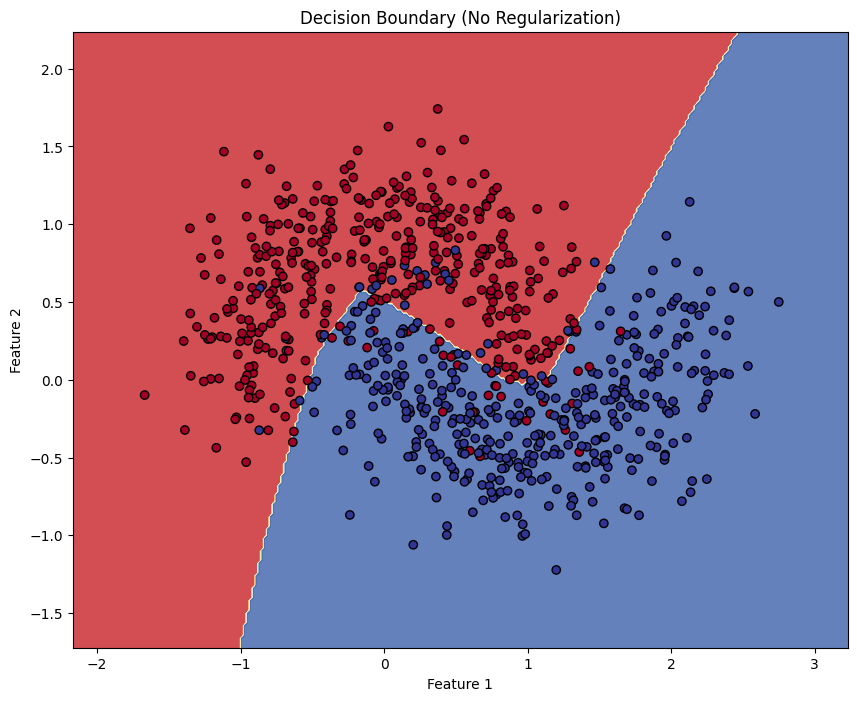

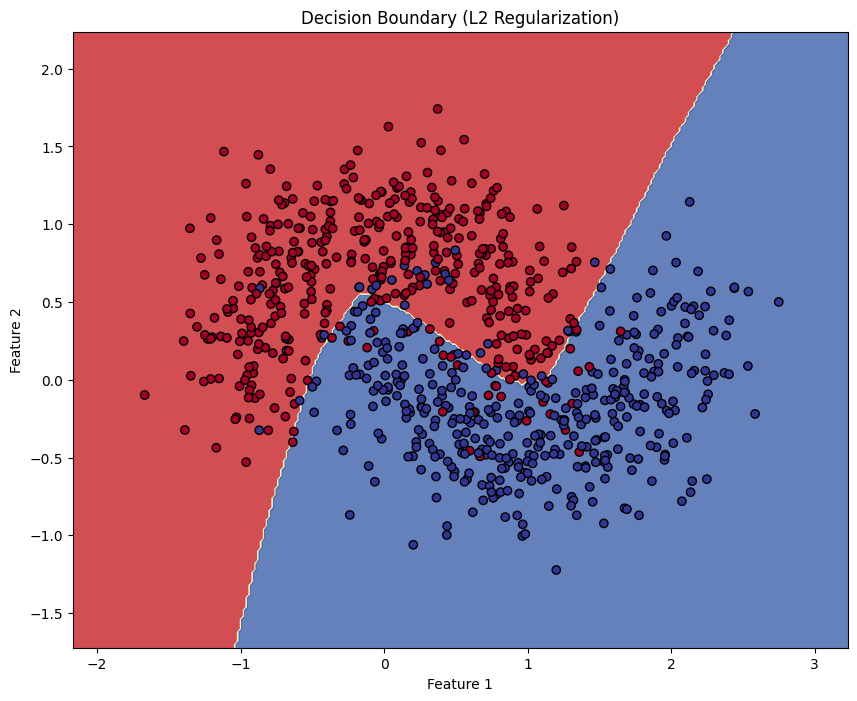

In [2]:
# Import necessary libraries
import matplotlib.pyplot as plt  # For data visualization
from sklearn.neural_network import MLPClassifier  # Multi-layer Perceptron classifier
from sklearn.model_selection import train_test_split  # Data splitting utility
from sklearn.datasets import make_moons  # Non-linear dataset generator
from sklearn.metrics import accuracy_score, classification_report  # Evaluation metrics
import numpy as np  # Numerical operations (implicitly used in meshgrid)

# Generate synthetic non-linearly separable data with 1000 samples, 30% noise
# make_moons creates two interleaving half circles [1]
X, y = make_moons(n_samples=1000, noise=0.3, random_state=42)

# Split dataset into 80% training and 20% test with stratified sampling
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42  # Seed for reproducibility
)

def plot_decision_boundary(X, y, model, title):
    """Visualizes the model's decision boundary and data points"""
    # Calculate plot boundaries with 0.5 padding
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    # Create mesh grid with 0.02 resolution for smooth boundary
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, 0.02),
        np.arange(y_min, y_max, 0.02)
    )

    # Predict class labels for grid points and reshape to match grid dimensions
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Create figure and plot decision surface
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)

    # Plot original data points with edge contrast
    plt.scatter(X[:, 0], X[:, 1], c=y,
                cmap=plt.cm.RdYlBu,
                edgecolor='black')  # Edge helps distinguish overlapping points

    # Add plot metadata
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Initialize MLP with 1 hidden layer (100 neurons) and train without regularization
mlp_no_reg = MLPClassifier(
    hidden_layer_sizes=(100,),  # Single hidden layer architecture
    max_iter=2000,  # Maximum training iterations
    random_state=42  # Seed for weight initialization
)
mlp_no_reg.fit(X_train, y_train)  # Train on training data

# Initialize MLP with L2 regularization (alpha=0.01)
mlp_l2 = MLPClassifier(
    hidden_layer_sizes=(100,),
    alpha=0.01,  # Regularization strength (λ in L2 regularization)
    max_iter=2000,
    random_state=42
)
mlp_l2.fit(X_train, y_train)

def evaluate_model(model, X_train, y_train, X_test, y_test):
    """Evaluates model performance on both training and test sets"""
    # Generate predictions
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    # Calculate accuracy scores
    train_accuracy = accuracy_score(y_train, train_pred)
    test_accuracy = accuracy_score(y_test, test_pred)

    # Print performance metrics
    print(f"Train Accuracy: {train_accuracy:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, test_pred))

# Compare model performances
print("Model without regularization:")
evaluate_model(mlp_no_reg, X_train, y_train, X_test, y_test)

print("\nModel with L2 regularization:")
evaluate_model(mlp_l2, X_train, y_train, X_test, y_test)

# Visualize decision boundaries for both models
plot_decision_boundary(X_train, y_train, mlp_no_reg,
                      "Decision Boundary (No Regularization)")
plot_decision_boundary(X_train, y_train, mlp_l2,
                      "Decision Boundary (L2 Regularization)")


**`Applying L1 Regularization (Lasso)`**

Lasso (alpha=0.001):
  MSE: 0.0132
  R2 Score: 0.9980
  Number of non-zero coefficients: 19

Lasso (alpha=0.01):
  MSE: 0.0144
  R2 Score: 0.9978
  Number of non-zero coefficients: 9

Lasso (alpha=0.1):
  MSE: 0.0738
  R2 Score: 0.9888
  Number of non-zero coefficients: 5

Lasso (alpha=1):
  MSE: 3.5573
  R2 Score: 0.4596
  Number of non-zero coefficients: 2

Lasso (alpha=10):
  MSE: 6.5884
  R2 Score: -0.0009
  Number of non-zero coefficients: 0



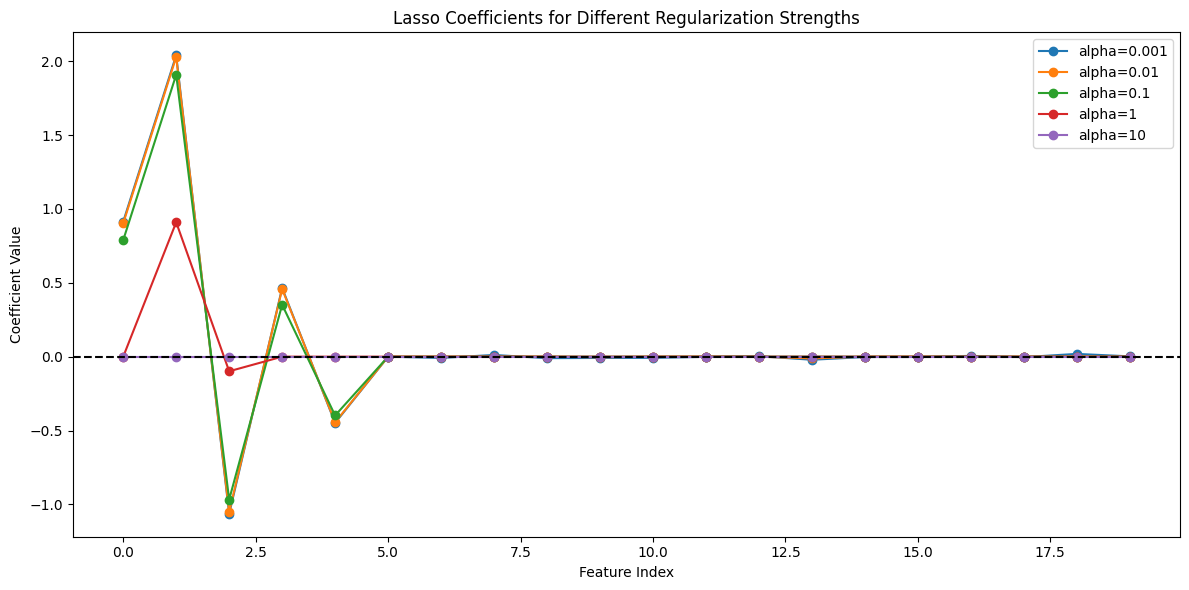

In [3]:
# Import necessary libraries
import numpy as np  # For numerical operations and array handling
import matplotlib.pyplot as plt  # For plotting graphs and visualizations
from sklearn.linear_model import Lasso  # Lasso regression implementation
from sklearn.model_selection import train_test_split  # For splitting data into train/test sets
from sklearn.preprocessing import StandardScaler  # For feature standardization
from sklearn.metrics import mean_squared_error, r2_score  # For evaluating regression performance

# -------------------------------
# Generate synthetic regression data
# -------------------------------

np.random.seed(42)  # Set random seed for reproducibility

X = np.random.randn(100, 20)  # Generate 100 samples, each with 20 features (from standard normal distribution)

true_weights = np.zeros(20)  # Initialize true weights as zeros for all 20 features
true_weights[:5] = [1, 2, -1, 0.5, -0.5]  # Only the first 5 features are relevant (non-zero weights)

# Generate target variable y as a linear combination of X and true_weights, add small Gaussian noise
y = np.dot(X, true_weights) + np.random.randn(100) * 0.1

# -------------------------------
# Split the data into training and test sets
# -------------------------------

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)  # 80% train, 20% test split

# -------------------------------
# Standardize features (zero mean, unit variance)
# -------------------------------

scaler = StandardScaler()  # Create a StandardScaler instance
X_train_scaled = scaler.fit_transform(X_train)  # Fit scaler on training data and transform
X_test_scaled = scaler.transform(X_test)  # Transform test data using the same scaler

# -------------------------------
# Train Lasso regression models with different regularization strengths
# -------------------------------

alphas = [0.001, 0.01, 0.1, 1, 10]  # List of L1 regularization strengths to try
models = []  # To store trained Lasso models

for alpha in alphas:
    lasso = Lasso(alpha=alpha, random_state=42)  # Create Lasso model with current alpha
    lasso.fit(X_train_scaled, y_train)  # Train model on standardized training data
    models.append(lasso)  # Store the trained model

# -------------------------------
# Evaluate each Lasso model on the test set
# -------------------------------

for i, model in enumerate(models):
    y_pred = model.predict(X_test_scaled)  # Predict target values for test set
    mse = mean_squared_error(y_test, y_pred)  # Compute Mean Squared Error
    r2 = r2_score(y_test, y_pred)  # Compute R2 score (coefficient of determination)
    print(f"Lasso (alpha={alphas[i]}):")
    print(f"  MSE: {mse:.4f}")
    print(f"  R2 Score: {r2:.4f}")
    # Count number of non-zero coefficients (features selected by Lasso)
    print(f"  Number of non-zero coefficients: {np.sum(model.coef_ != 0)}")
    print()

# -------------------------------
# Visualize feature importance (Lasso coefficients) for different alphas
# -------------------------------

plt.figure(figsize=(12, 6))  # Set the size of the plot
for i, model in enumerate(models):
    # Plot the coefficients for each model (one curve per alpha)
    plt.plot(range(20), model.coef_, label=f'alpha={alphas[i]}', marker='o')

plt.axhline(y=0, color='k', linestyle='--')  # Draw horizontal line at y=0 for reference
plt.xlabel('Feature Index')  # Label x-axis
plt.ylabel('Coefficient Value')  # Label y-axis
plt.title('Lasso Coefficients for Different Regularization Strengths')  # Set plot title
plt.legend()  # Show legend to distinguish different alphas
plt.tight_layout()  # Optimize layout
plt.show()  # Display the plot


Implementing L1 Regularization in MultiLayer Perceptron (as there is no
suppport in sklearn, we have to create custom class)

Baseline Model (No Regularization):
Training Accuracy: 0.9100
Test Accuracy: 0.9450

Detailed Classification Report:
              precision    recall  f1-score   support

           0     0.9495    0.9400    0.9447       100
           1     0.9406    0.9500    0.9453       100

    accuracy                         0.9450       200
   macro avg     0.9450    0.9450    0.9450       200
weighted avg     0.9450    0.9450    0.9450       200


L2 Regularized Model:
Training Accuracy: 0.9087
Test Accuracy: 0.9450

Detailed Classification Report:
              precision    recall  f1-score   support

           0     0.9495    0.9400    0.9447       100
           1     0.9406    0.9500    0.9453       100

    accuracy                         0.9450       200
   macro avg     0.9450    0.9450    0.9450       200
weighted avg     0.9450    0.9450    0.9450       200


Custom L1 Regularized Model:
Training Accuracy: 0.9100
Test Accuracy: 0.9450

Detailed Classification Report:
              

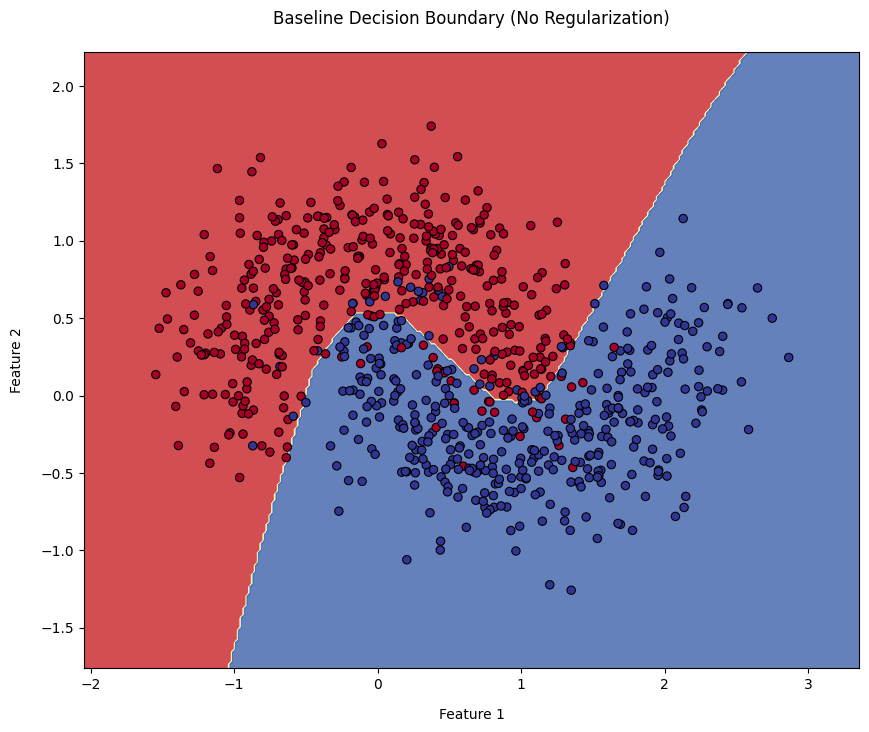

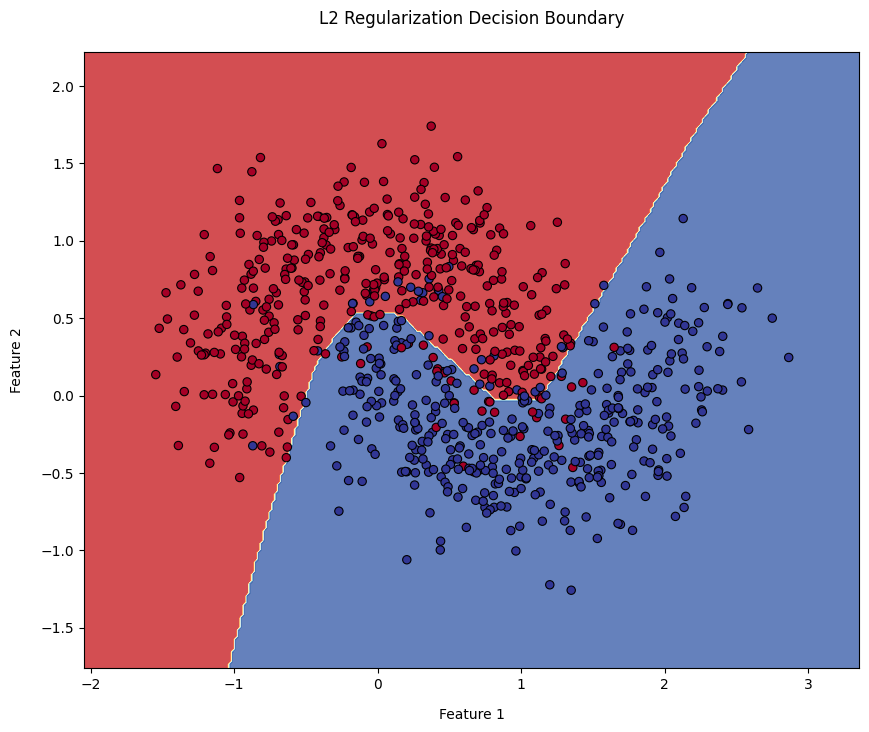

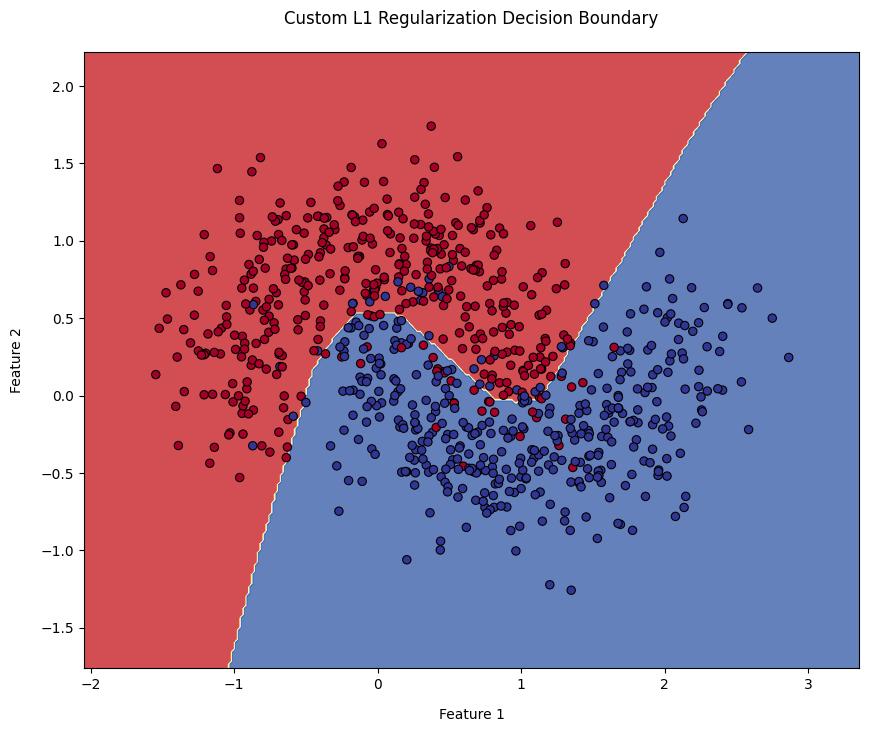

In [4]:
# Import essential libraries for ML workflow
import matplotlib.pyplot as plt  # Visualization toolkit for plotting
from sklearn.neural_network import MLPClassifier  # Neural network implementation
from sklearn.model_selection import train_test_split  # Data splitting utility
from sklearn.datasets import make_moons  # Synthetic dataset generation
from sklearn.metrics import accuracy_score, classification_report  # Model evaluation
import numpy as np  # Numerical computing library

# Generate synthetic moon-shaped dataset with controlled noise
# make_moons creates two interleaving half circles (non-linear separation challenge)
X, y = make_moons(
    n_samples=1000,  # Total data points
    noise=0.3,  # Added variance for realism
    random_state=42  # Seed for reproducible results
)

# Split data into training/test sets with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,  # 20% holdout for testing
    random_state=42,  # Fixed randomization seed
    stratify=y  # Maintain class distribution in splits
)

def plot_decision_boundary(X, y, model, title):
    """Visualizes model's decision regions with high resolution mesh grid"""
    # Establish axis boundaries with padding
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    # Create coordinate matrices from vectors (mesh grid)
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, 0.02),  # X-axis grid spacing
        np.arange(y_min, y_max, 0.02)   # Y-axis grid spacing
    )

    # Predict classes for entire grid space
    grid_points = np.c_[xx.ravel(), yy.ravel()]  # Flatten and combine coordinates
    Z = model.predict(grid_points)  # Batch prediction
    Z = Z.reshape(xx.shape)  # Reshape to original grid dimensions

    # Create figure container
    plt.figure(figsize=(10, 8))

    # Plot decision surface using filled contours
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)

    # Overlay original data points with contrasting edges
    plt.scatter(X[:, 0], X[:, 1], c=y,
                cmap=plt.cm.RdYlBu,
                edgecolor='black',  # Improve point visibility
                linewidth=0.8)

    # Add plot annotations
    plt.title(title, pad=20)
    plt.xlabel('Feature 1', labelpad=12)
    plt.ylabel('Feature 2', labelpad=12)
    plt.show()

# Initialize baseline model without regularization
mlp_no_reg = MLPClassifier(
    hidden_layer_sizes=(100,),  # Single hidden layer with 100 neurons
    activation='relu',  # Rectified Linear Unit activation function
    solver='adam',  # Optimization algorithm
    max_iter=2000,  # Maximum training iterations
    random_state=42  # Reproducible weight initialization
)
mlp_no_reg.fit(X_train, y_train)  # Train on training data

# Initialize model with L2 regularization (weight decay)
mlp_l2 = MLPClassifier(
    hidden_layer_sizes=(100,),
    alpha=0.01,  # L2 regularization strength (λ)
    max_iter=2000,
    random_state=42
)
mlp_l2.fit(X_train, y_train)

# Custom implementation for L1 regularization (Manhattan distance penalty)
# Note: scikit-learn's MLPClassifier doesn't natively support L1 regularization
# This implementation adds L1 penalty during loss calculation
class MLPWithL1(MLPClassifier):
    def __init__(self, alpha_l1=0.01, **kwargs):
        super().__init__(**kwargs)
        self.alpha_l1 = alpha_l1  # L1 regularization coefficient

    def _loss_grad_lbfgs(self, *args, **kwargs):
        # Calculate original loss and gradient
        loss, grad = super()._loss_grad_lbfgs(*args, **kwargs)

        # Add L1 penalty to loss (sum of absolute weights)
        l1_penalty = sum(np.sum(np.abs(w)) for w in self.coefs_)
        loss += self.alpha_l1 * l1_penalty

        # Add L1 gradient contribution (sign of weights)
        for i in range(len(grad)):
            grad[i] += self.alpha_l1 * np.sign(self.coefs_[i])

        return loss, grad

# Initialize model with custom L1 regularization
mlp_l1 = MLPWithL1(
    hidden_layer_sizes=(100,),
    alpha_l1=0.01,  # L1 regularization strength
    max_iter=2000,
    random_state=42
)
mlp_l1.fit(X_train, y_train)

def evaluate_model(model, X_train, y_train, X_test, y_test):
    """Comprehensive model evaluation with training/test metrics"""
    # Generate predictions for both datasets
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    # Calculate classification accuracy
    train_accuracy = accuracy_score(y_train, train_pred)
    test_accuracy = accuracy_score(y_test, test_pred)

    # Print formatted results
    print(f"Training Accuracy: {train_accuracy:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    print("\nDetailed Classification Report:")
    print(classification_report(y_test, test_pred, digits=4))

# Performance comparison across regularization strategies
print("Baseline Model (No Regularization):")
evaluate_model(mlp_no_reg, X_train, y_train, X_test, y_test)

print("\nL2 Regularized Model:")
evaluate_model(mlp_l2, X_train, y_train, X_test, y_test)

print("\nCustom L1 Regularized Model:")
evaluate_model(mlp_l1, X_train, y_train, X_test, y_test)

# Visualize decision boundaries for all models
plot_decision_boundary(X_train, y_train, mlp_no_reg,
                      "Baseline Decision Boundary (No Regularization)")
plot_decision_boundary(X_train, y_train, mlp_l2,
                      "L2 Regularization Decision Boundary")
plot_decision_boundary(X_train, y_train, mlp_l1,
                      "Custom L1 Regularization Decision Boundary")
